In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;


In [3]:
df = pd.read_csv('train.csv', usecols=['Fare', 'Age' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
X = df.drop('Survived' , axis=1)
y = df['Survived']

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [10]:
X_train['age_imputed'] = X_train['Age']
X_test['age_imputed'] = X_test['Age']

In [19]:
len(X_train.Age.dropna().sample(X_train.Age.isnull().sum()).values)

148

In [24]:
X_train['age_imputed'][X_train['age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: age_imputed, Length: 148, dtype: float64

In [ ]:
X_train['age_imputed'][X_train['age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


In [28]:
X_test['age_imputed'][X_test['age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [31]:
X_test.sample(10)

,Age,Fare,age_imputed
317,54.0,14.0000,54.0
414,44.0,7.9250,44.0
291,19.0,91.0792,19.0
251,29.0,10.4625,29.0
740,NaN,30.0000,30.0
18,31.0,18.0000,31.0
728,25.0,26.0000,25.0
7,2.0,21.0750,2.0
676,24.5,8.0500,24.5
546,19.0,26.0000,19.0


In [32]:
import seaborn as sns

C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_21172\2700160568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='original' , hist=False , color='blue')
C:\Users\AMAN CHOUDHARY\AppData\Local\Temp\ipykernel_21172\2700160568.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

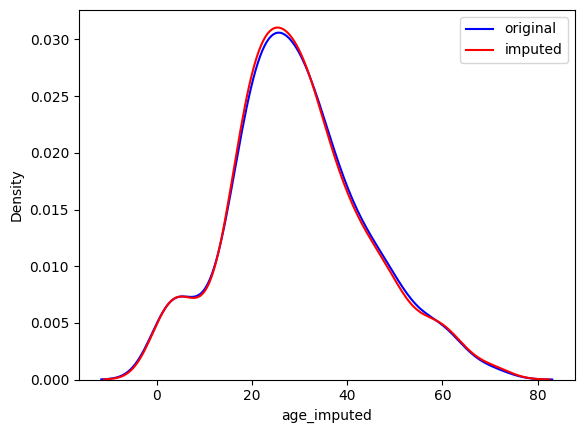

In [41]:
sns.distplot(X_train['Age'],label='original' , hist=False , color='blue')
sns.distplot(X_train['age_imputed'], label='imputed' , hist=False , color='red')
plt.legend()
plt.show()

In [44]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  205.208046201544


In [45]:
X_train[['Fare', 'Age', 'age_imputed']].cov()

,Fare,Age,age_imputed
Fare,2368.246832,71.512440,59.136023
Age,71.512440,204.349513,204.349513
age_imputed,59.136023,204.349513,205.208046


<Axes: >

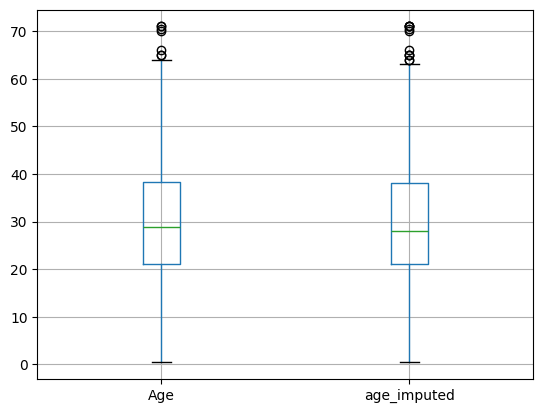

In [47]:
X_train[['Age', 'age_imputed']].boxplot()

In [53]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])
print(data.shape)
data.head()

(1460, 3)


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [56]:
print(data.isnull().sum())
data.isnull().mean()*100

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [57]:
X = data
y = data.SalePrice